### Data Wrangling

In [1]:
# Clear the workspace
rm(list = ls())

# Load necessary packages
library(reshape2)  # data manipulation

In [2]:
# Dependent variable:
dep <- read.csv("homicide-rates.csv", header = TRUE, skip = 1)

dep.molten <- melt(dep,
                   id.vars = c("Sigla",
                               "Código",
                               "Estado")
                    )

colnames(dep.molten) <- c("abbreviation",
                          "code",
                          "state",
                          "year",
                          "homicide.rates")

dep.molten$year <- as.numeric(substring(dep.molten$year, 2))



In [3]:
# Independent variables
ind1 <- read.csv("state-gdp-capita.csv", header = TRUE, skip = 1)

ind1.molten <- melt(ind1,
                    id.vars = c("Sigla",
                                "Código",
                                "Estado")
                    )

colnames(ind1.molten) <- c("abbreviation",
                           "code",
                           "state",
                           "year",
                           "state.gdp.capita")

ind1.molten$year <- as.numeric(substring(ind1.molten$year, 2))

ind2 <- read.csv("state-gdp-growth-percentage.csv", header = TRUE, skip = 1)

ind2.molten <- melt(ind2,
                    id.vars = c("Sigla",
                                "Código",
                                "Estado")
                    )

colnames(ind2.molten) <- c("abbreviation",
                           "code",
                           "state",
                           "year",
                           "state.gdp.growth.percent")

ind2.molten$year <- as.numeric(substring(ind2.molten$year, 2))

ind3 <- read.csv("gini.csv", header = TRUE, skip = 1)

ind3.molten <- melt(ind3,
                    id.vars = c("Sigla",
                                "Código",
                                "Estado")
                    )

colnames(ind3.molten) <- c("abbreviation",
                           "code",
                           "state",
                           "year",
                           "gini")

ind3.molten$year <- as.numeric(substring(ind3.molten$year, 2))

ind4 <- read.csv("population-projection.csv",
                 header = TRUE,
                 skip   = 1)

ind4.molten <- melt(ind4,
                    id.vars = c("Sigla",
                                "Código",
                                "Estado")
                    )

colnames(ind4.molten) <- c("abbreviation",
                           "code",
                           "state",
                           "year",
                           "population.projection")

ind4.molten$year <- as.numeric(substring(ind4.molten$year, 2))

ind5 <- read.csv("population-extreme-poverty.csv", header = TRUE, skip = 1)

ind5.molten <- melt(ind5,
                    id.vars = c("Sigla",
                                "Código",
                                "Estado")
                    )

colnames(ind5.molten) <- c("abbreviation",
                           "code",
                           "state",
                           "year",
                           "population.extreme.poverty")

ind5.molten$year <- as.numeric(substring(ind5.molten$year, 2))

ind6 <- read.csv("years-schooling.csv", header = TRUE, skip = 1)

ind6.molten <- melt(ind6,
                    id.vars = c("Sigla",
                                "Código",
                                "Estado")
                    )

colnames(ind6.molten) <- c("abbreviation",
                           "code",
                           "state",
                           "year",
                           "years.schooling")

ind6.molten$year <- as.numeric(substring(ind6.molten$year, 2))


In [4]:
# Merges files
data.list <- list(dep.molten,
                  ind1.molten,
                  ind2.molten,
                  ind3.molten,
                  ind4.molten,
                  ind5.molten,
                  ind6.molten)

data1 <- Reduce(function(...) merge(..., all = TRUE), data.list)

# Subset and sort
data2 <- subset(data1, year >= 1990 & year <= 2009)
data2 <- data2[order(data2$state), ]
rownames(data2) <- NULL

# Count missing observations, calculate their percentage
round(sapply(data2, function(x) length(which(is.na(x)))), 2)
round(sapply(data2, function(x) length(which(is.na(x)))/length(x)), 2)

abbreviation                       code 
                         0                          0 
                     state                       year 
                         0                          0 
            homicide.rates           state.gdp.capita 
                         0                          0 
  state.gdp.growth.percent                       gini 
                         0                         82 
     population.projection population.extreme.poverty 
                         0                         82 
           years.schooling 
                        82

abbreviation                       code 
                      0.00                       0.00 
                     state                       year 
                      0.00                       0.00 
            homicide.rates           state.gdp.capita 
                      0.00                       0.00 
  state.gdp.growth.percent                       gini 
                      0.00                       0.15 
     population.projection population.extreme.poverty 
                      0.00                       0.15 
           years.schooling 
                      0.15

Combine the data into a single data frame uisng same column names and also including values without a match. data2 contains rows form years 1990 to 2009. Than we print out the the numebr of missing values and the percentage of missing values in the dataframe.

In [5]:
# Linear imputation of missing values.
data2$gini.imp <- approxfun(seq_along(data2$gini), data2$gini)(seq_along(data2$gini))
data2$population.extreme.poverty.imp <- approxfun(seq_along(data2$population.extreme.poverty), data2$population.extreme.poverty)(seq_along(data2$population.extreme.poverty))
data2$years.schooling.imp <- approxfun(seq_along(data2$years.schooling), data2$years.schooling)(seq_along(data2$years.schooling))

Here we are imputing the missing values for the columns gini, population.extreme.poverty, and years.schooling. 

The approxfun() function is used to create a linear approximation function for each variable, with the first argument being the sequence of data points along the variable axis, and the second argument being the actual variable values.

The seq_along() function is used to generate a sequence of indices that correspond to the missing values for each variable, and these indices are used as input to the linear approximation function to impute the missing values.

The resulting imputed values are assigned back to the data2 data frame as new columns with the suffix ".imp" (e.g., gini.imp, population.extreme.poverty.imp, and years.schooling.imp).

In [6]:
# Create proportion.extreme.poverty
data2$proportion.extreme.poverty <- data2$population.extreme.poverty.imp / data2$population.projection

# Transform variables to improve interpretation
data2$population.projection.ln <- log(data2$population.projection)

# Save data as df.csv
write.table(data2,
            "df.csv",
            row.names = FALSE,
            col.names = TRUE,
            sep       = ",")

Here we are calculating the proprotion of population living in extreme poverty than we are transforming the population projection to logscale in order to make it easier to interpret and also making it useful for some statistical analysis later. Lastly we save it all to the new dataframe df.csv.

### Data Analysis

In [7]:
# Clear the workspace
rm(list = ls())

# Load necessary packages
library(dplyr) # data manipulation
library(Synth) # models


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


##
## Synth Package: Implements Synthetic Control Methods.


## See http://www.mit.edu/~jhainm/software.htm for additional information.





In [8]:
df <- read.csv("df.csv", header = TRUE)
head(df)

,abbreviation,code,state,year,homicide.rates,state.gdp.capita,state.gdp.growth.percent,gini,population.projection,population.extreme.poverty,years.schooling,gini.imp,population.extreme.poverty.imp,years.schooling.imp,proportion.extreme.poverty,population.projection.ln
,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AC,12,Acre,1990,15.75288,8.504651,3.680272,0.5443582,413495,48965,4.806932,0.5443582,48965.0,4.806932,0.11841739,12.93240
2,AC,12,Acre,1991,25.13658,8.723272,4.948625,NA,422341,NA,NA,0.5519728,54937.5,5.497757,0.13007854,12.95357
3,AC,12,Acre,1992,24.66935,8.575808,2.903720,0.5595874,438834,60910,6.188582,0.5595874,60910.0,6.188582,0.13879964,12.99188
4,AC,12,Acre,1993,26.05720,8.591944,3.301005,0.5532199,455233,57492,5.585392,0.5532199,57492.0,5.585392,0.12629137,13.02856
5,AC,12,Acre,1994,19.71004,8.473742,1.566072,NA,471677,NA,NA,0.5677723,48075.5,5.713217,0.10192462,13.06405
6,AC,12,Acre,1995,22.62478,8.577749,4.131693,0.5823248,488112,38659,5.841043,0.5823248,38659.0,5.841043,0.07920108,13.09830


In [9]:
# Load data
df <- read.csv("df.csv", header = TRUE)

# Prepare dataset
df$state <- as.character(df$state) # required by dataprep()


In [10]:
# Plot: Homicide rates for Sao Paulo and Brazil (average)
df1 <- df %>%
        mutate(homicide.sp = ifelse(homicide.rates & state == "São Paulo", homicide.rates, NA)) %>%
        select(year, homicide.sp)

df2 <- df %>%
        mutate(homicide.rates1 = ifelse(homicide.rates & state != "São Paulo", homicide.rates, NA)) %>%
        group_by(year) %>%
        summarise(homicide.br = mean(homicide.rates1, na.rm = TRUE))




Creating two data framnes. df1 holds homicide rate per year infor for Sao Paulo and df2 holds homicide rate per year infor for all states beside Sao Paulo. Taking the avergae of teh homicide rates in df2 gives us an estimate of teh homicde rate for Brazil.

In [11]:
head(df2)

year,homicide.br
<int>,<dbl>
1990,20.90104
1991,20.28838
1992,19.14512
1993,19.56729
1994,20.05278
1995,21.55432


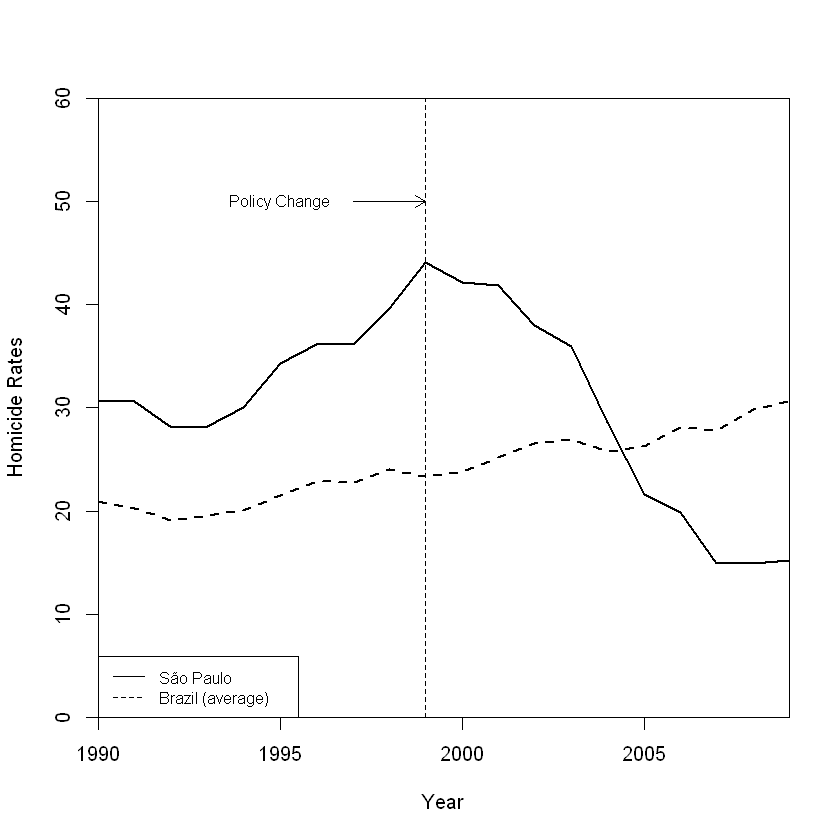

In [12]:
plot(x = df1$year,
     y = df1$homicide.sp,
     type = "l",
     ylim = c(0, 60),
     xlim = c(1990, 2009),
     xlab = "Year",
     ylab = "Homicide Rates",
     cex = 3,
     lwd = 2,
     xaxs = "i",
     yaxs = "i"
)

lines(df2$year,
      df2$homicide.br,
      lty = 2,
      cex = 3,
      lwd = 2)

arrows(1997, 50, 1999, 50,
       col    = "black",
       length = .1)

text(1995, 50,
     "Policy Change",
     cex = .8)

abline(v   = 1999,
       lty = 2)

legend(x = "bottomleft",
       legend = c("São Paulo",
                  "Brazil (average)"),
       lty    = c("solid", "dashed"),
       cex    = .8,
       bg     = "white",
       lwdc(2, 2)
)


Plot to visualize homicide rates for Sao Paulo and our frankenstien brazil over the years with a dashed verticle line showing the year of policy change.

In [13]:
# Prepare data for synth
dataprep.out <-
        dataprep(df,
                 predictors = c("state.gdp.capita",
                                "state.gdp.growth.percent",
                                "population.projection.ln",
                                "years.schooling.imp"
                                ),
                 special.predictors = list(
                         list("homicide.rates", 1990:1998, "mean"),
                         list("proportion.extreme.poverty", 1990:1998, "mean"),
                         list("gini.imp", 1990:1998, "mean")
                         ),
                 predictors.op = "mean",
                 dependent     = "homicide.rates",
                 unit.variable = "code",
                 time.variable = "year",
                 unit.names.variable   = "state",
                 treatment.identifier  = 35,
                 controls.identifier   = c(11:17, 21:27, 31:33, 41:43, 50:53),
                 time.predictors.prior = c(1990:1998),
                 time.optimize.ssr     = c(1990:1998),
                 time.plot             = c(1990:2009)
                 )

In [14]:
# Run synth
synth.out <- synth(dataprep.out)

# Get result tables
print(synth.tables   <- synth.tab(
        dataprep.res = dataprep.out,
        synth.res    = synth.out)
      )


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 2.660544 

solution.v:
 0.2752884 8.00985e-05 0.0006707994 0.4687482 0.2411453 0.008954685 0.005112477 

solution.w:
 1.59427e-05 1.04959e-05 1.19579e-05 0.1367322 1.12166e-05 2.60626e-05 3.83051e-05 0.0001724405 4.13242e-05 4.2473e-05 2.87778e-05 2.45509e-05 0.0006475294 5.92964e-05 8.7124e-06 0.208757 0.1690749 2.58467e-05 0.2739272 1.98343e-05 6.8578e-06 1.06507e-05 9.9014e-06 0.2102964 

$tab.pred
                                             Treated Synthetic Sample Mean
state.gdp.capita                              23.285    23.079      11.830
state.gdp.growth.percent                       1.330     2.585       3.528
population.projection.ln                      17.335    14.838      14.867
years.schooling.imp                            6.089     6.110       4.963
special.homicide.rates.1990.199

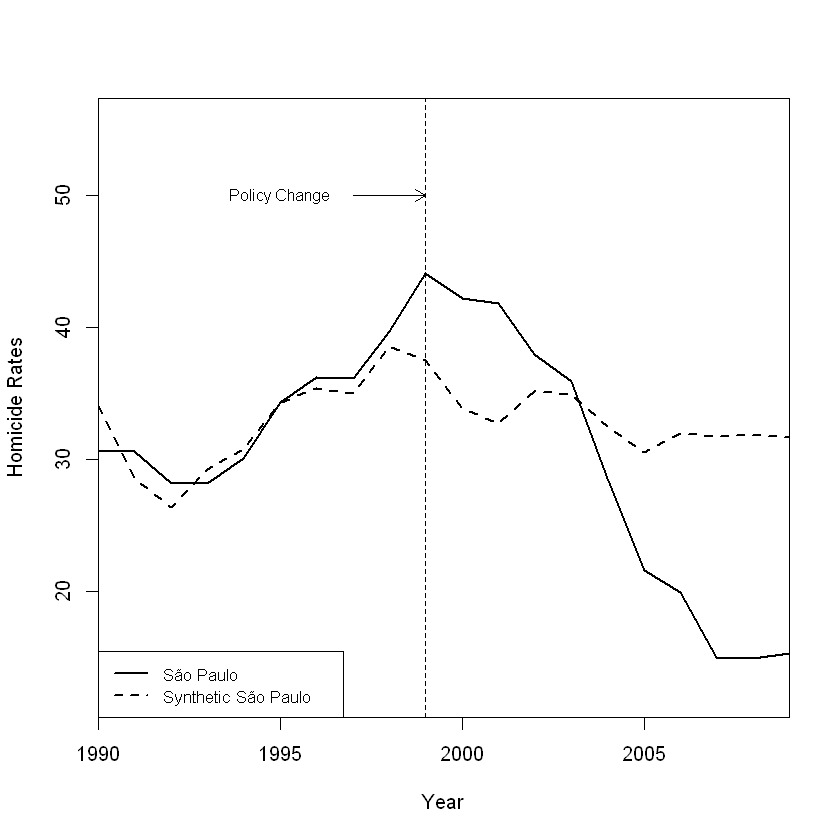

In [15]:
path.plot(synth.res    = synth.out,
          dataprep.res = dataprep.out,
          Ylab         = c("Homicide Rates"),
          Xlab         = c("Year"),
          Legend       = c("São Paulo","Synthetic São Paulo"),
          Legend.position = c("bottomleft")
)

abline(v   = 1999,
       lty = 2)

arrows(1997, 50, 1999, 50,
       col    = "black",
       length = .1)

text(1995, 50,
     "Policy Change",
     cex = .8)


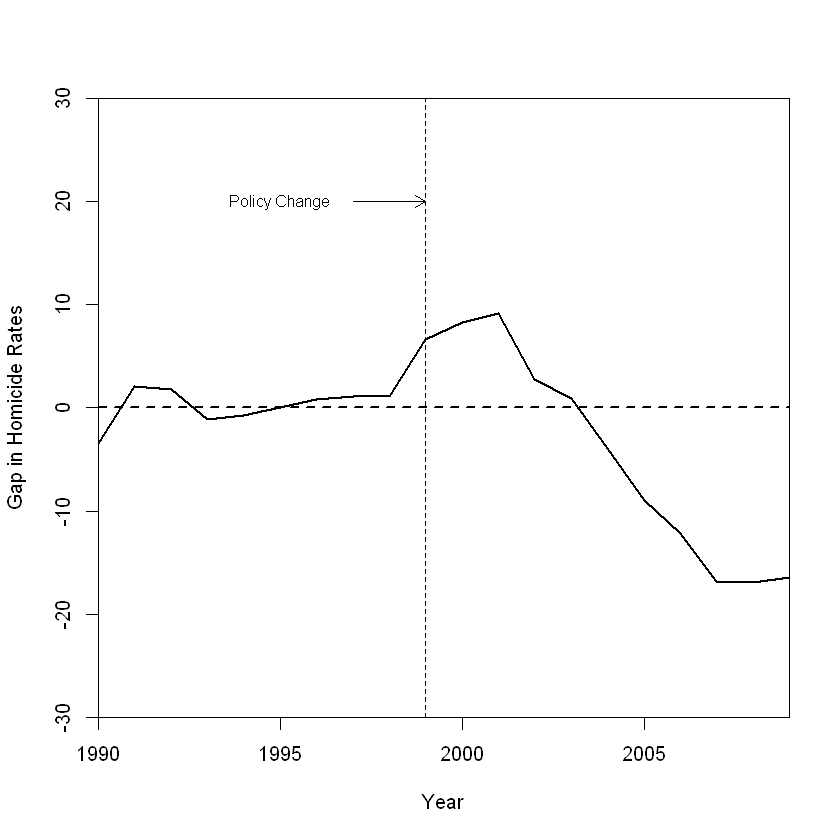

In [16]:
gaps.plot(synth.res    = synth.out,
          dataprep.res = dataprep.out,
          Ylab         = c("Gap in Homicide Rates"),
          Xlab         = c("Year"),
          Ylim         = c(-30, 30),
          Main         = ""
)

abline(v   = 1999,
       lty = 2)

arrows(1997, 20, 1999, 20,
       col    = "black",
       length = .1)

text(1995, 20,
     "Policy Change",
     cex = .8)


In [17]:
# Get years after policy change
df.2 <- df[which(df$year >= 1999),]

# Calculate total number of deaths in SP
num.deaths.sp <- sum( (df.2$homicide.rates[which(df.2$abbreviation == "SP")])/100000 * (df.2$population.projection[which(df.2$abbreviation == "SP")]))

# Calculate estimated number of deaths in Synthetic São Paulo
num.deaths.synthetic.sp <- sum( (0.274 * (df.2$homicide.rates[which(df.2$abbreviation == "SC")])/100000 * (df.2$population.projection[which(df.2$abbreviation == "SP")]))
                                + (0.210 * (df.2$homicide.rates[which(df.2$abbreviation == "DF")])/100000 * (df.2$population.projection[which(df.2$abbreviation == "SP")]))
                                + (0.209 * (df.2$homicide.rates[which(df.2$abbreviation == "ES")])/100000 * (df.2$population.projection[which(df.2$abbreviation == "SP")]))
                                + (0.169 * (df.2$homicide.rates[which(df.2$abbreviation == "RJ")])/100000 * (df.2$population.projection[which(df.2$abbreviation == "SP")]))
                                + (0.137 * (df.2$homicide.rates[which(df.2$abbreviation == "RR")])/100000 * (df.2$population.projection[which(df.2$abbreviation == "SP")]))
                                + (0.001 * (df.2$homicide.rates[which(df.2$abbreviation == "PB")])/100000 * (df.2$population.projection[which(df.2$abbreviation == "SP")]))
                                )

lives.saved <- num.deaths.synthetic.sp - num.deaths.sp
lives.saved # Between 1999 and 2009

[1] 20331.17

### Extention

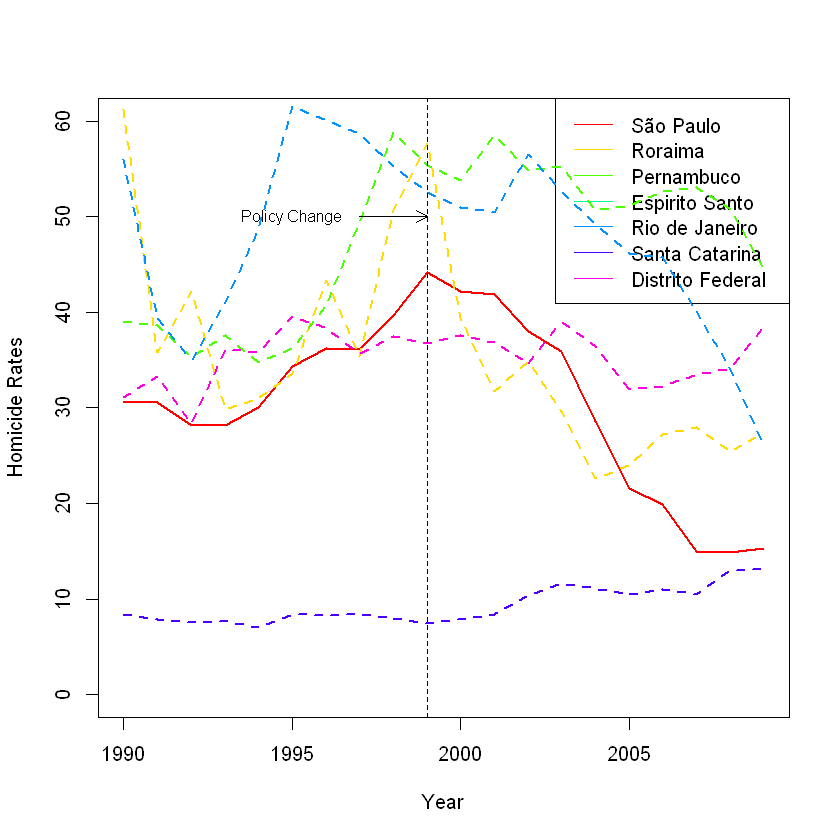

In [18]:
# Clear the workspace
rm(list = ls())

# Load data
df <- read.csv("df.csv", header = TRUE)

# States to include
states <- c("São Paulo", "Roraima", "Pernambuco", "Espirito Santo", "Rio de Janeiro", "Santa Catarina", "Distrito Federal")

# Generate vector of colors
colors <- rainbow(length(states))

# Plot: Homicide rates for all states
plot(NA, xlim = c(1990, 2009), ylim = c(0, 60), xlab = "Year", ylab = "Homicide Rates")
legend("topright", legend = states, col = colors, lty = 1, cex = 1, bg = "white")

for (i in 1:length(states)) {
  state <- states[i]
  x <- df$year[df$state == state]
  y <- df$homicide.rates[df$state == state]
  if (state == "São Paulo") {
    lines(x, y, col = "red", cex = 3, lwd = 2)
  } else {
    lines(x, y, col = colors[i], lty = 2, cex = 3, lwd = 2)
  }
}

arrows(1997, 50, 1999, 50,
       col    = "black",
       length = .1)

text(1995, 50,
     "Policy Change",
     cex = .8)

abline(v   = 1999,
       lty = 2)


In [19]:
# States to include
states <- c("São Paulo", "Roraima", "Pernambuco", "Espírito Santo", "Rio de Janeiro", "Santa Catarina", "Distrito Federal")

# Initialize data frame
df_means <- data.frame(state = character(length(states)), 
                       pre_treatment = numeric(length(states)), 
                       post_treatment = numeric(length(states)),
                       pre_and_post_treatment_diff = numeric(length(states)),
                       difference_in_differences = numeric(length(states)))

# Filter data by year and state
df_sp_pre <- filter(df, year >= 1990 & year <= 1999 & state == "São Paulo")
df_sp_post <- filter(df, year >= 1999 & year <= 2009 & state == "São Paulo")


# Calculate mean homicide rate
mean_sp_pre <- mean(df_sp_pre$homicide.rates)
mean_sp_post <- mean(df_sp_post$homicide.rates)

# Pre- and post-treatment difference for sp
diff_sp <- mean_sp_post - mean_sp_pre

# Loop over states
for (i in seq_along(states)) {
  # Filter data by year and state
  df_pre <- filter(df, year >= 1990 & year <= 1999 & state == states[i])
  df_post <- filter(df, year >= 1999 & year <= 2009 & state == states[i])
  
  # Calculate mean homicide rate
  mean_pre <- mean(df_pre$homicide.rates)
  mean_post <- mean(df_post$homicide.rates)

  # Pre- and post-treatment difference for other
  diff_other <- mean_post - mean_pre

  # Difference in differences estimate
  did <- diff_sp - diff_other

  
  # Store in data frame
  df_means[i, "state"] <- states[i]
  df_means[i, "pre_treatment"] <- mean_pre
  df_means[i, "post_treatment"] <- mean_post
  df_means[i, "pre_and_post_treatment_diff"] <- diff_other
  df_means[i, "difference_in_differences"] <- did
}


In [20]:
# Initialize data frame
df_lives_saved <- data.frame(state = character(length(states)), 
                       num_deaths = numeric(length(states)), 
                       lives_saved = numeric(length(states))
                       )

# Get years after policy change
df.2 <- df[which(df$year >= 1999),]

# Calculate total number of deaths in SP
num.deaths.sp <- sum( (df.2$homicide.rates[which(df.2$state == "São Paulo")])/100000 * (df.2$population.projection[which(df.2$state == "São Paulo")]))



for (i in seq_along(states)) {

    num.deaths.other <- sum( (df.2$homicide.rates[which(df.2$state == states[i])])/100000 * (df.2$population.projection[which(df.2$state == "São Paulo")]))

    lives.saved <- num.deaths.other - num.deaths.sp
  
  
  # Store in data frame
  df_lives_saved[i, "state"] <- states[i]
  df_lives_saved[i, "num_deaths"] <- num.deaths.other
  df_lives_saved[i, "lives_saved"] <- lives.saved
  df_lives_saved[i, "difference_in_differences"] <- df_means$difference_in_differences[i]
}

df_lives_saved

state,num_deaths,lives_saved,difference_in_differences
<chr>,<dbl>,<dbl>,<dbl>
São Paulo,124076.91,0.00,0.00000000
Roraima,136871.41,12794.50,5.46101113
Pernambuco,230209.29,106132.38,-15.16846502
Espírito Santo,223391.83,99314.92,-12.73438051
Rio de Janeiro,199145.61,75068.69,-0.02426829
Santa Catarina,45942.08,-78134.83,-7.53887324
Distrito Federal,155403.67,31326.76,-5.36398281
